## Question 1

In [1]:
using PyPlot

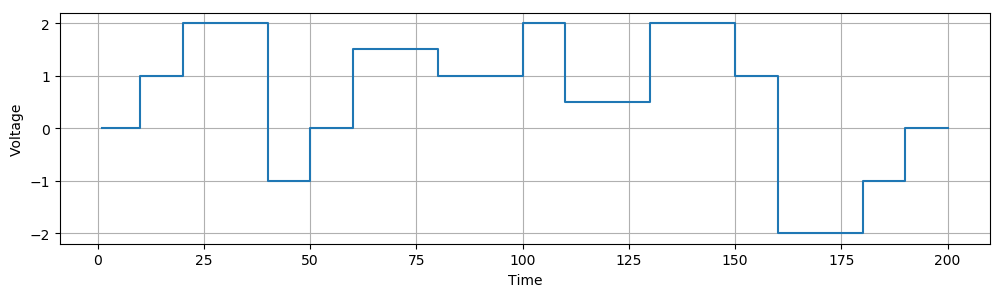

In [19]:
in_voltage = readcsv("voltages.csv")
figure(figsize=(12,3))
step(1:200,in_voltage)
xlabel("Time"); ylabel("Voltage"); grid();

In [91]:
using JuMP, Mosek

T=200
m = Model(solver=MosekSolver(LOG=0))
@variable(m, out_voltage[1:T]) # variable to hold the new voltages

# expression to describe the regularization function
@expression(m, reg_function, sum((out_voltage[i] - out_voltage[i-1])^2 for i in 2:length(out_voltage)))


:Optimal

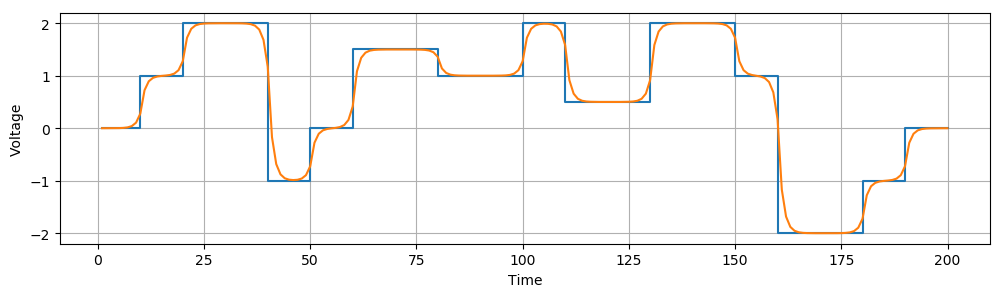

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa8314a3990>

In [104]:
lambda = 1
@objective(m, Min, sum((out_voltage - in_voltage).^2) + lambda*reg_function) 
solve(m)
figure(figsize=(12,3))
step(1:200,raw)
xlabel("Time"); ylabel("Voltage"); grid();
plot(1:200, getvalue(out_voltage))




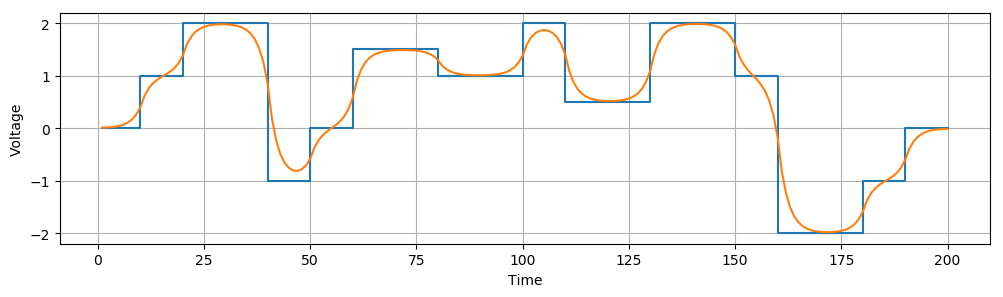

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa831a59bd0>

In [93]:
# lambda
lambda = 5
# objective function
@objective(m, Min, sum((out_voltage - in_voltage).^2) + lambda*reg_function) 
solve(m)
figure(figsize=(12,3))
step(1:200,raw)
xlabel("Time"); ylabel("Voltage"); grid();
plot(1:200, getvalue(out_voltage))

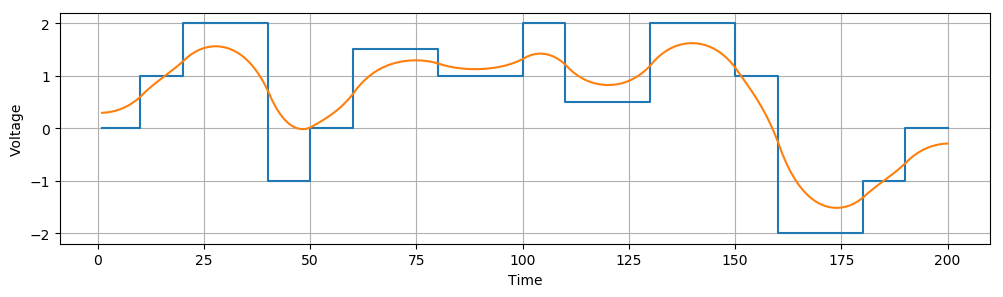

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa8318f4810>

In [96]:
# lambda
lambda = 50
# objective function
@objective(m, Min, sum((out_voltage - in_voltage).^2) + lambda*reg_function) 
solve(m)
figure(figsize=(12,3))
step(1:200,raw)
xlabel("Time"); ylabel("Voltage"); grid();
plot(1:200, getvalue(out_voltage))

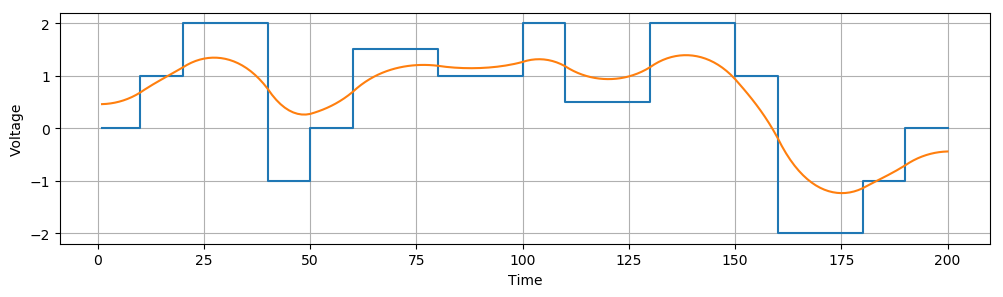

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa831801190>

In [97]:
# lambda
lambda = 100
# objective function
@objective(m, Min, sum((out_voltage - in_voltage).^2) + lambda*reg_function) 
solve(m)
figure(figsize=(12,3))
step(1:200,raw)
xlabel("Time"); ylabel("Voltage"); grid();
plot(1:200, getvalue(out_voltage))

Case when lambda is less than 1, we get a tighter fit

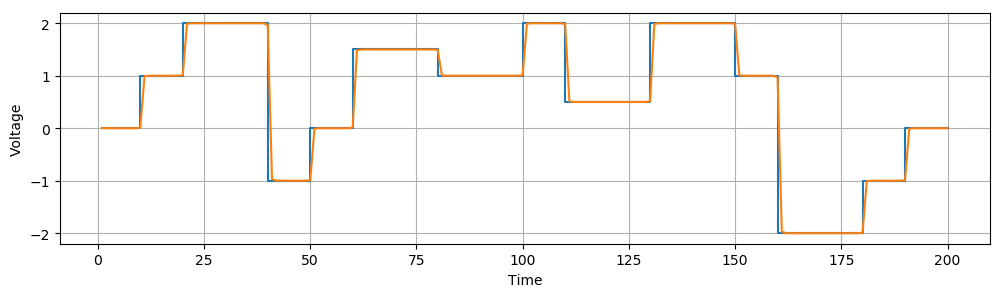

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa8311cd890>

In [109]:
# lambda
lambda = 0.01
# objective function
@objective(m, Min, sum((out_voltage - in_voltage).^2) + lambda*reg_function) 
solve(m)
figure(figsize=(12,3))
step(1:200,raw)
xlabel("Time"); ylabel("Voltage"); grid();
plot(1:200, getvalue(out_voltage))

## Question 3

##### Part (a)

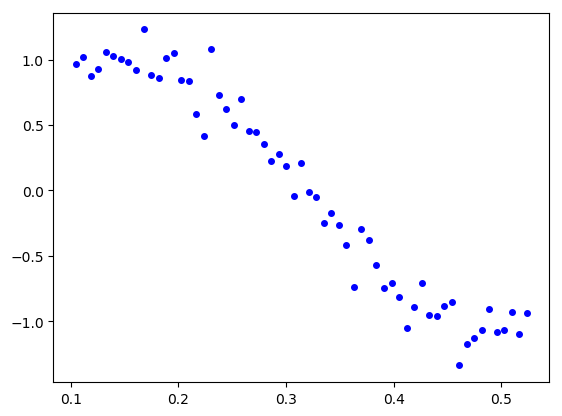

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f67c0220950>

In [6]:
using PyPlot
raw = readcsv("lasso_data.csv")
plot(raw[:,1], raw[:,2], "bo", markersize = 4)


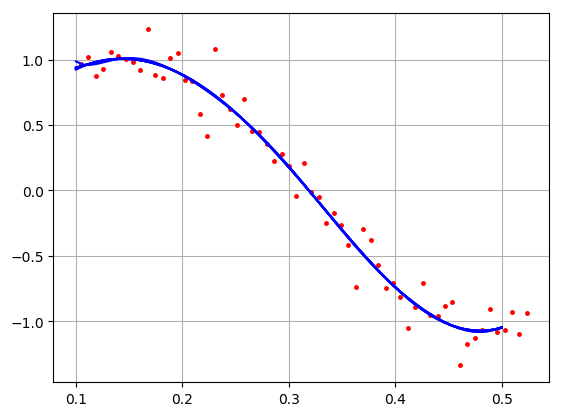

In [9]:

using JuMP, Mosek
# order of the polynomial to use
k = 5
# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(raw[:,1])

# create the A matrix with coefficients
# the main objective here is to find the coefficients
# doing raw[i,1]^(k+1-j) is simply like doing x^i.
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = raw[i,1]^(k+1-j)
    end
end

m = Model(solver=MosekSolver(LOG=0))

# declare variable for getting the coefficients
@variable(m, u[1:k+1])
@objective(m, Min, sum((raw[:,2] - A*u).^2))

status = solve(m)
uopt = getvalue(u)
#println(status)

npts = 60
xfine = linspace(0.1,0.5,npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
plot(raw[:,1], raw[:,2],"r.", markersize = 5)
plot(xfine, yfine, "b-")
grid("on")




for k in 6:15
    # fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
    n = length(raw[:,1])

    # create the A matrix with coefficients
    # the main objective here is to find the coefficients
    # doing raw[i,1]^(k+1-j) is simply like doing x^i.
    A = zeros(n,k+1)
    for i = 1:n
        for j = 1:k+1
            A[i,j] = raw[i,1]^(k+1-j)
        end
    end

    m = Model(solver=MosekSolver(LOG=0))

    # declare variable for getting the coefficients
    @variable(m, u[1:k+1])
    @objective(m, Min, sum((raw[:,2] - A*u).^2))

    status = solve(m)
    uopt = getvalue(u)
    #println(status)

    npts = 60
    xfine = linspace(0.1,0.5,npts)
    ffine = ones(npts)
    for j = 1:k
        ffine = [ffine.*xfine ones(npts)]
    end
    yfine = ffine * uopt
    #plot(raw[:,1], raw[:,2],"r.", markersize = 5)
    plot(xfine, yfine, "b-")
    #grid("on")
end
    

The following values of variable u represent the coefficients 

In [10]:
getvalue(u)

16-element Array{Float64,1}:
     -2.88446e6
     -1.46772e6
      2.60498e6
      3.92245e6
     -3.93226e6
      0.0      
      6.06798e5
      0.0      
      0.0      
 -47271.7      
      0.0      
  14368.0      
  -5924.52     
   1009.81     
    -77.0078   
      3.07714  

##### Part (b)

Plot when we use L2 regularizer with a lambda of 10^6 

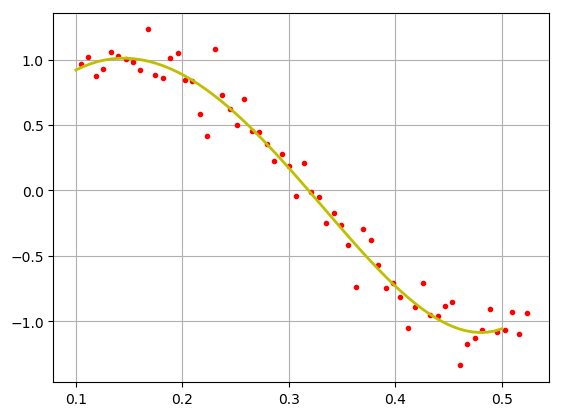

Optimal


In [11]:
using JuMP, Mosek
# order of the polynomial to use
k = 15
# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(raw[:,1])

# create the A matrix with coefficients
# the main objective here is to find the coefficients
# doing raw[i,1]^(k+1-j) is simply like doing x^i.
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = raw[i,1]^(k+1-j)
    end
end

m = Model(solver=MosekSolver(LOG=0))

lambda = 1e-6
# declare variable for getting the coefficients
@variable(m, u[1:k+1])
@objective(m, Min, sum((raw[:,2] - A*u).^2) + lambda*sum((u.^2)))

status = solve(m)
uopt = getvalue(u)
println(status)

npts = 60
xfine_15 = linspace(0.1,0.5,npts)
ffine_15 = ones(npts)
for j = 1:k
    ffine_15 = [ffine_15.*xfine_15 ones(npts)]
end
yfine_15 = ffine_15 * uopt
plot(raw[:,1], raw[:,2],"r.", markersize = 6)
plot(xfine_15, yfine_15, "y-", linewidth = 2)
grid("on")

The following values of u indicate coefficients when we add l2 regularization (ridge regression)

In [12]:
getvalue(u)

16-element Array{Float64,1}:
  -0.594575  
  -0.97555   
  -1.54971   
  -2.35425   
  -3.3504    
  -4.29447   
  -4.50957   
  -2.5878    
   3.71181   
  16.5014    
  33.919     
  42.0642    
  11.6286    
 -55.0324    
  14.6022    
  -0.00544862

When we compare the coefficients in part b to that in part a, we can see that the coefficients are more smoothed out in comparison.

##### Part (c)

In [14]:
using JuMP, Mosek
# order of the polynomial to use
k = 15
# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(raw[:,1])

# create the A matrix with coefficients
# the main objective here is to find the coefficients
# doing raw[i,1]^(k+1-j) is simply like doing x^i.
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = raw[i,1]^(k+1-j)
    end
end

m = Model(solver=MosekSolver(LOG=0,))



lambda_vals = linspace(0.0009,0.0001,1000)
# lambda_vals = 0.001
# declare variable for getting the coefficients
@variable(m, u[1:k+1])
# 1-norm
@variable(m, t[1:k+1])
@constraint(m, u .<= t)
@constraint(m, -t .<= u)
vals = []

for lambda in lambda_vals
    
    @objective(m, Min, sum((raw[:,2] - A*u).^2) + lambda*sum(t))
    
    status = solve(m)

    
    uopt = getvalue(u)
    
    #= 
    npts = 60
    xfine_15 = linspace(0.1,0.5,npts)
    ffine_15 = ones(npts)
    for j = 1:k
        ffine_15 = [ffine_15.*xfine_15 ones(npts)]
    end
    yfine_15 = ffine_15 * uopt
    plot(raw[:,1], raw[:,2],"r.", markersize = 6)
    plot(xfine_15, yfine_15, "y-", linewidth = 2)
    grid("on")
    =#
    count = 0
 
    coeff_values = getvalue(u)
    for i in 1:length(coeff_values)
        if coeff_values[i] < 1e-5
            coeff_values[i] = 0.0
        else
            count = count + 1
        end
    end
    
    push!(vals, count)
    

end


In [15]:
min_element = vals[1]
pos = 1
for i in 1:length(vals)
    if vals[i] < min_element
        min_element = vals[i]
        pos = i
    end
end



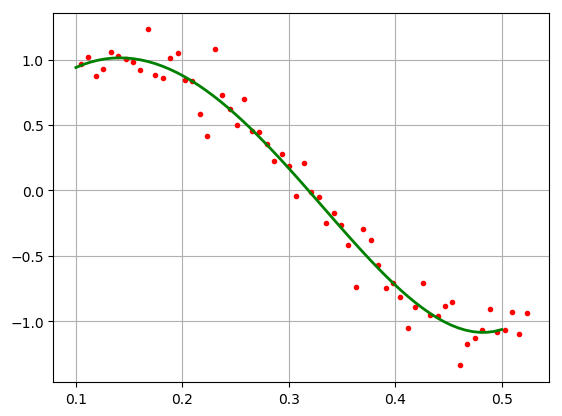

In [32]:
@objective(m, Min, sum((raw[:,2] - A*u).^2) + lambda_vals[pos]*sum(t))

status = solve(m)


uopt = getvalue(u)
#println(status)


npts = 60
xfine_15 = linspace(0.1,0.5,npts)
ffine_15 = ones(npts)
for j = 1:k
    ffine_15 = [ffine_15.*xfine_15 ones(npts)]
end
yfine_15 = ffine_15 * uopt
plot(raw[:,1], raw[:,2],"r.", markersize = 6)
plot(xfine_15, yfine_15, "g-", linewidth = 2)
grid("on")

In [13]:
println("We get ", min_element, " parameters for a lambda of ", lambda_vals[pos])

LoadError: [91mUndefVarError: min_element not defined[39m